# EJERCICIO COMPLETO CLASIFICACIÓN


In [530]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [532]:
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [498]:
df.shape

(768, 9)

In [500]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [502]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

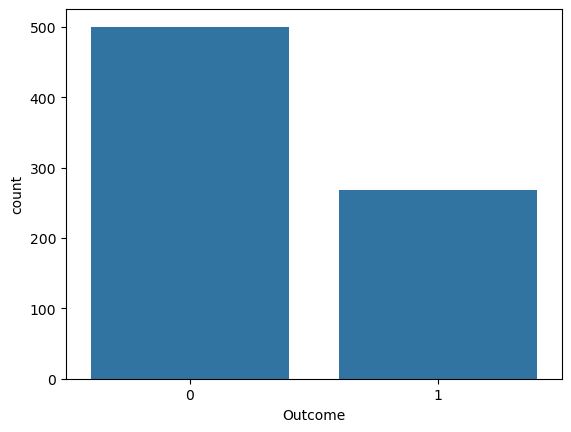

In [540]:
sns.countplot(df, x=df.Outcome)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

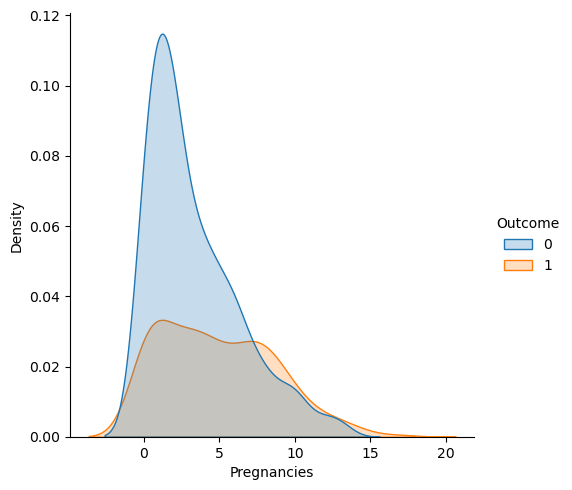

In [506]:
sns.displot(df, x=df.Pregnancies, hue=df.Outcome, kind="kde", fill=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

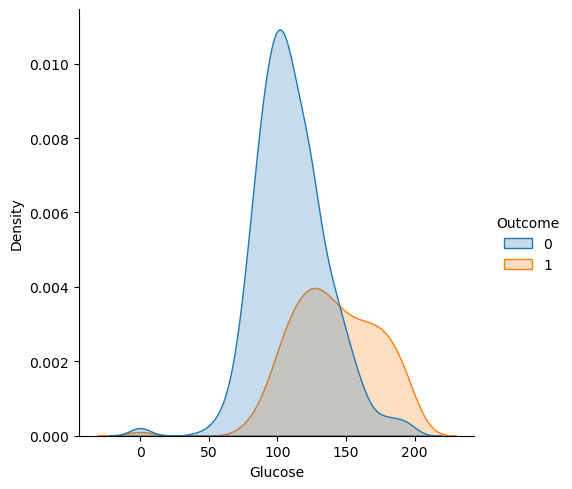

In [508]:
sns.displot(df, x=df.Glucose, hue=df.Outcome, kind="kde", fill=True)
plt.show

<Axes: >

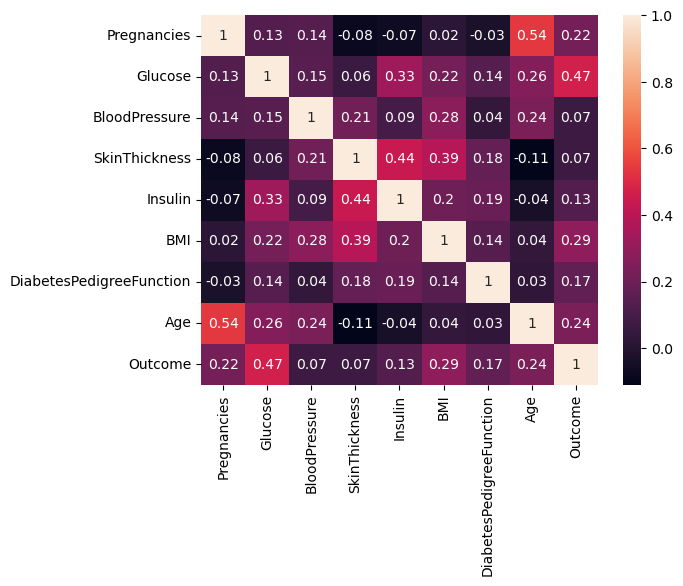

In [510]:
cm = df.corr().round(2)
sns.heatmap(data=cm, annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

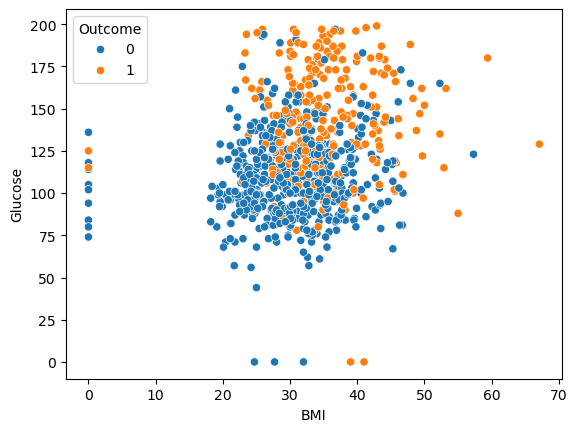

In [512]:
sns.scatterplot(x=df.BMI, y=df.Glucose, hue=df.Outcome)
plt.show

In [514]:
df.describe() #se deberían revisar las muestras con valores imposibles (glucosa, tension, ST, BMI = 0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [516]:
glucose_0 = df[df.Glucose == 0]
len(glucose_0)

5

In [525]:
bp_0 = df[df.BloodPressure == 0]
len(bp_0)

35

In [527]:
st_0 = df[df.SkinThickness == 0] # Aquí muchas entradas parecen erróneas
len(st_0)

227

In [350]:
bmi_0 = df[df.BMI == 0]
len(bmi_0)

11

Separación de variables:

In [55]:
X = df.drop("Outcome", axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [57]:
y = df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Separación train-test:

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=0)

Escalado de variables:

In [66]:
from sklearn.preprocessing import StandardScaler

In [73]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [77]:
X_test

array([[-0.8354355 ,  2.45735903,  0.34674316, ...,  1.35224513,
         2.78594417, -0.96569189],
       [-0.54480808, -0.43719633,  0.24436264, ...,  0.17619533,
        -0.1876381 , -0.88240283],
       [ 0.03644676, -1.41253563, -0.36992051, ...,  0.22677812,
        -0.22668514, -0.71582471],
       ...,
       [ 0.03644676,  0.66399321,  0.85864578, ...,  1.4913478 ,
         0.53623395, -0.96569189],
       [-0.25418066, -0.15403331,  0.24436264, ..., -0.74694053,
        -1.07971278, -0.79911377],
       [-0.8354355 , -0.43719633,  0.14198211, ..., -0.17788417,
         1.06487079, -0.79911377]])

### DTC:

In [118]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [120]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [122]:
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

In [363]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       107
           1       0.65      0.77      0.71        47

    accuracy                           0.81       154
   macro avg       0.77      0.79      0.78       154
weighted avg       0.82      0.81      0.81       154



In [365]:
print(confusion_matrix(y_test,y_pred_test))

[[88 19]
 [11 36]]


In [367]:
fpr_dtc, tpr_dtc, threshold_dtc = roc_curve(y_pred_test,y_test)
roc_auc_dtc = roc_auc_score(y_test,y_pred_test)

In [369]:
print("RESULTADOS DTC:")
print("acc: ", accuracy_score(y_test,y_pred_test))
print("f1: ", f1_score(y_test,y_pred_test))
print("prec: ", precision_score(y_test,y_pred_test))
print("rec: ", recall_score(y_test,y_pred_test))
print("auc: ", roc_auc_dtc)

RESULTADOS DTC:
acc:  0.8051948051948052
f1:  0.7058823529411765
prec:  0.6545454545454545
rec:  0.7659574468085106
auc:  0.7941936766752834


### Logistic Regression:

In [134]:
from sklearn.linear_model import LogisticRegression

In [137]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [140]:
y_pred_lr  = classifier.predict(X_test)

In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, recall_score

In [371]:
conf_lr = confusion_matrix(y_test, y_pred_lr)
conf_lr

array([[98,  9],
       [18, 29]], dtype=int64)

In [373]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [375]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_pred_lr)

In [377]:
print("RESULTADOS REGRESION LOGISTICA")
print("acc: ", accuracy_score(y_test, y_pred_lr))
print("f1: ", f1_score(y_test, y_pred_lr))
print("prec: ", precision_score(y_test, y_pred_lr))
print("rec :", recall_score(y_test, y_pred_lr))
print("auc: ", roc_auc)

RESULTADOS REGRESION LOGISTICA
acc:  0.8246753246753247
f1:  0.6823529411764706
prec:  0.7631578947368421
rec : 0.6170212765957447
auc:  0.7664545635315172


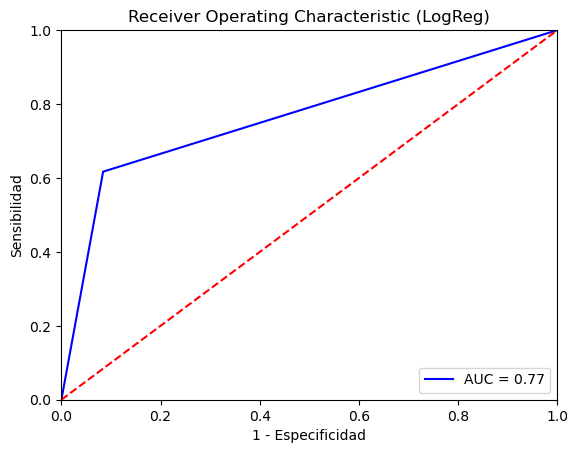

In [256]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic (LogReg)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensibilidad')
plt.xlabel('1 - Especificidad')
plt.show()

### KNN:

In [184]:
from sklearn.neighbors import KNeighborsClassifier

In [308]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [310]:
y_pred_kn  = classifier_knn.predict(X_test)
y_pred_kn

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [379]:
cm_kn = confusion_matrix(y_test, y_pred_kn)
cm_kn

array([[93, 14],
       [17, 30]], dtype=int64)

In [385]:
print(classification_report(y_test, y_pred_kn))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154



In [381]:
fpr_kn, tpr_kn, threshold_kn = roc_curve(y_test, y_pred_kn)
roc_auc_kn = roc_auc_score(y_test, y_pred_kn)

In [387]:
print("RESULTADOS KNN:")
print("acc: ", accuracy_score(y_test, y_pred_kn))
print("f1: ", f1_score(y_test, y_pred_kn))
print("prec: ", precision_score(y_test, y_pred_kn))
print("rec :", recall_score(y_test, y_pred_kn))
print("auc: ", roc_auc_kn)

RESULTADOS KNN:
acc:  0.7987012987012987
f1:  0.6593406593406593
prec:  0.6818181818181818
rec : 0.6382978723404256
auc:  0.7537283754225492


Al tratarse de pacientes se debería considerar la menor tasa de falsos negativos (error Tipo II).
De los modelos probados, el que más respeta lo anterior es la REGRESION LOGÍSTICA, a la vez de tener algunas de las mejores métricas de calidad y ser un modelo más sencillo.

Probamos GridSearch:

In [405]:
from sklearn.model_selection import GridSearchCV

In [408]:
param_grid = {"C":np.linspace(0.1, 10, 100), "penalty":["l1", "l2"]}

In [411]:
grid = GridSearchCV(classifier, param_grid)

In [414]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
                         'penalty': ['l1', 'l2']})

In [416]:
grid.best_params_

{'C': 0.2, 'penalty': 'l2'}

In [419]:
grid_prediction = grid.best_estimator_.predict(X_test)

In [422]:
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [ ]:
#tras el gridsearch los resultados fueron iguales a la prediccion anterior, solo cambio el valor de C (de 1 a 0.2) sin afectar el modelo

Probamos selección de variables:

In [431]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [437]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

In [439]:
dataset_seleccion = pd.DataFrame()
for i in range(1, len(X_train_df.columns)):
    sbs = SFS(LogisticRegression(C=0.2, penalty="l2"),k_features=i,forward=False,floating=False)
    sbs.fit(np.array(X_train), y_train)
    sbs.k_feature_names_
    classifier = LogisticRegression(C=0.2, penalty="l2")
    classifier.fit(X_train_df[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]], y_train)
    y_pred = classifier.predict(X_test_df[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]])
    accuracy = accuracy_score(y_test, y_pred)
    dataset_seleccion = pd.concat([dataset_seleccion,pd.DataFrame({"variables":[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]],"accuracy": accuracy})],ignore_index = True)


In [442]:
dataset_seleccion.sort_values("accuracy", ascending=False)

,variables,accuracy
6,"[Pregnancies, Glucose, BloodPressure, Insulin,...",0.824675
3,"[Pregnancies, Glucose, BMI, DiabetesPedigreeFu...",0.811688
5,"[Pregnancies, Glucose, Insulin, BMI, DiabetesP...",0.811688
4,"[Pregnancies, Glucose, Insulin, BMI, DiabetesP...",0.805195
2,"[Glucose, BMI, DiabetesPedigreeFunction]",0.798701
0,[Glucose],0.785714
1,"[Glucose, BMI]",0.785714


In [446]:
dataset_seleccion["variables"][6]

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [448]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
 #se podría descartar la columna SkinThickness. Muchas muestras faltaban y no aporta mucho al modelo

Definición de las nuevas variables predictoras:

In [456]:
new_X = df[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']]
new_X.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33


Separacion train, test:

In [459]:
new_X_train, new_X_test, y_train, y_test = train_test_split(new_X,y,train_size=0.8, random_state=0)

Escalado de new_X:

In [464]:
new_sc_X = StandardScaler()
new_X_train = sc_X.fit_transform(new_X_train)
new_X_test = sc_X.transform(new_X_test)

In [468]:
LogisticRegression(random_state=0).fit(new_X_train, y_train)

LogisticRegression(random_state=0)

In [470]:
new_y_pred_lr  = classifier.predict(new_X_test)

In [475]:
new_conf_lr = confusion_matrix(y_test, new_y_pred_lr)
new_conf_lr

array([[98,  9],
       [18, 29]], dtype=int64)

In [477]:
print(classification_report(y_test, new_y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [479]:
fpr, tpr, threshold = roc_curve(y_test, new_y_pred_lr)
roc_auc = roc_auc_score(y_test, new_y_pred_lr)

In [485]:
print("NUEVOS RESULTADOS REGRESION LOGISTICA")
print("acc: ", accuracy_score(y_test, new_y_pred_lr))
print("f1: ", f1_score(y_test, new_y_pred_lr))
print("prec: ", precision_score(y_test, new_y_pred_lr))
print("rec :", recall_score(y_test, new_y_pred_lr))
print("auc: ", roc_auc)

NUEVOS RESULTADOS REGRESION LOGISTICA
acc:  0.8246753246753247
f1:  0.6823529411764706
prec:  0.7631578947368421
rec : 0.6170212765957447
auc:  0.7664545635315172


In [ ]:
#NO HAY DIFERENCIAS RESPECTO AL TEST INICIAL TRAS QUITAR LA VARIABLE SKINTHICKNESS (???)

In [489]:
X_train.shape

(614, 8)

In [491]:
new_X_train.shape

(614, 7)